<a href="https://colab.research.google.com/github/AryanNautiyal/Anemia-Sense/blob/main/model_code/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Creating a dataframe
df = pd.read_csv('anemia-dataset.csv')
print(df)

      Gender  Hemoglobin   MCH  MCHC   MCV  Result
0          1        14.9  22.7  29.1  83.7       0
1          0        15.9  25.4  28.3  72.0       0
2          0         9.0  21.5  29.6  71.2       1
3          0        14.9  16.0  31.4  87.5       0
4          1        14.7  22.0  28.2  99.5       0
...      ...         ...   ...   ...   ...     ...
1416       0        10.6  25.4  28.2  82.9       1
1417       1        12.1  28.3  30.4  86.9       1
1418       1        13.1  17.7  28.1  80.7       1
1419       0        14.3  16.2  29.5  95.2       0
1420       0        11.8  21.2  28.4  98.1       1

[1421 rows x 6 columns]


In [4]:
# Checking NULL counts and datatype of each column in dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB
None


In [5]:
# Checking size of dataset
print(df.shape)

(1421, 6)


In [6]:
# Checking the number of NULL values present
print(df.isnull().sum())

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64


In [7]:
# Checking if dataset is imbalanced or balanced
result = df['Result'].value_counts()
print(result)

Result
0    801
1    620
Name: count, dtype: int64


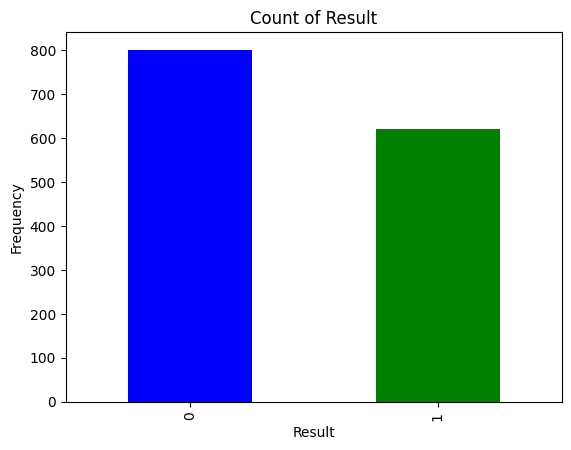

In [8]:
# Visualizing if dataset is imbalanced or balanced ( 0 = Not anemic && 1 = Anemic)
result.plot(kind = 'bar' , color = ['blue', 'green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result')
plt.show()

In [9]:
# Since Not anemic examples are more in dataset than anemic examples
# Therefore will do undersampling to make the dataset balanced

# Importing required module
from sklearn.utils import resample

# Dividing the dataset in anemic and not anemic
major_class = df[df['Result'] == 0]
minor_class = df[df['Result'] == 1]

# Undersampling or downsampling major class (0 = Not anemic)
major_downsample = resample(major_class, replace = False, n_samples = len(minor_class), random_state=42)

# Joining the datasets to create one in which there is balance
df = pd.concat([major_downsample, minor_class])


# Checking if the dataset is now balanced after undersampling
print(df['Result'].value_counts())

Result
0    620
1    620
Name: count, dtype: int64


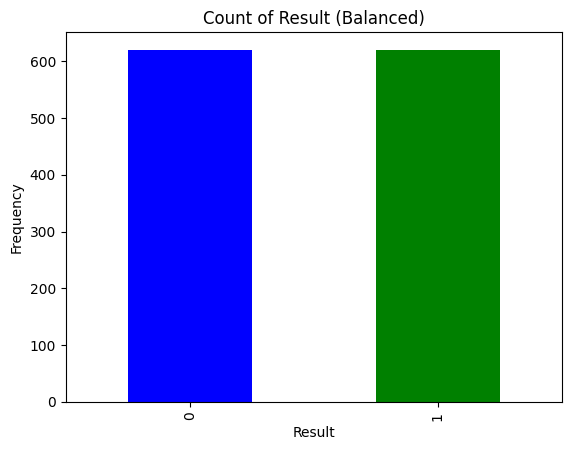

In [10]:
# Visualizing for a balanced dataset
result_balanced = df['Result'].value_counts()
result_balanced.plot(kind = 'bar' , color = ['blue', 'green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result (Balanced)')
plt.show()

In [11]:
# To get the mean , std and all of the dataframe
print(df.describe())

            Gender   Hemoglobin          MCH         MCHC          MCV  \
count  1240.000000  1240.000000  1240.000000  1240.000000  1240.000000   
mean      0.540323    13.218145    22.903952    30.277984    85.620968   
std       0.498573     1.976190     3.993624     1.394515     9.673794   
min       0.000000     6.600000    16.000000    27.800000    69.400000   
25%       0.000000    11.500000    19.400000    29.100000    77.300000   
50%       1.000000    13.000000    22.700000    30.400000    85.300000   
75%       1.000000    14.900000    26.200000    31.500000    94.225000   
max       1.000000    16.900000    30.000000    32.500000   101.600000   

            Result  
count  1240.000000  
mean      0.500000  
std       0.500202  
min       0.000000  
25%       0.000000  
50%       0.500000  
75%       1.000000  
max       1.000000  


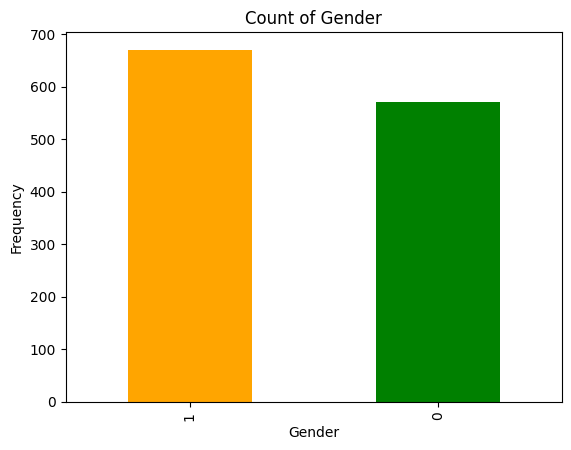

In [12]:
# Analyzing the imbalances in gender column
output = df['Gender'].value_counts()
output.plot(kind = 'bar' , color = ['orange', 'green'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Count of Gender')
plt.show()

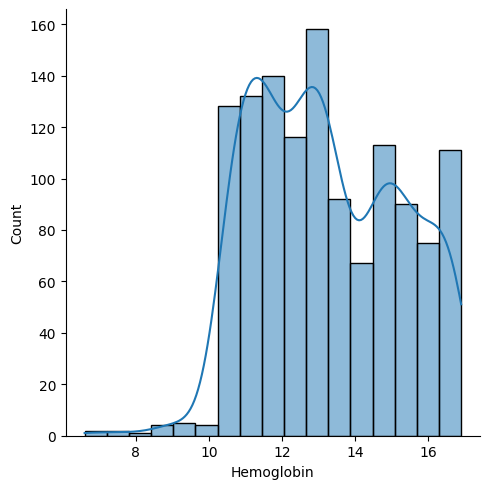

In [13]:
# Analyzing general distribution of hemoglobin
sns.displot(df['Hemoglobin'], kde = True)

<ipython-input-14-10e4067a7d55>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(y = df['Hemoglobin'], x = df['Gender'], hue = df['Result'], ci = None)


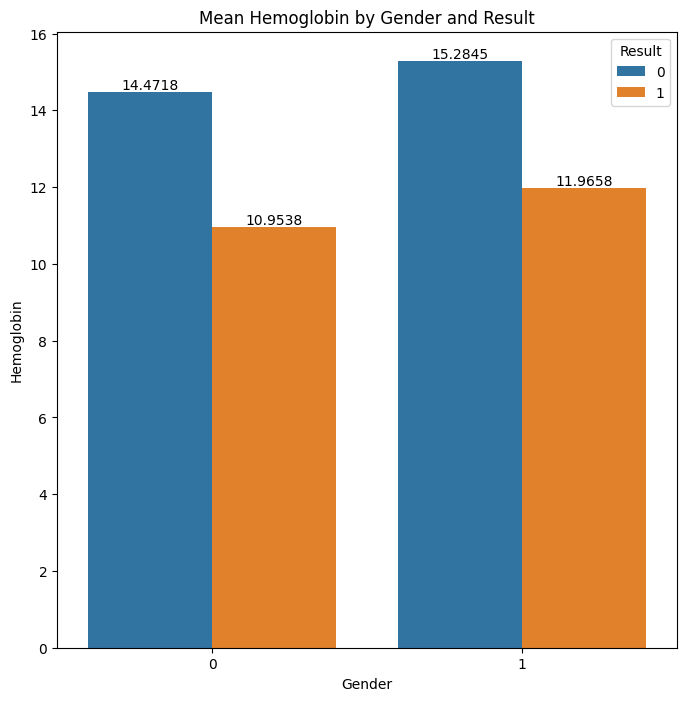

In [14]:
# Average hemoglobin values across genders and their association with the result

plt.figure(figsize=(8,8))
ax = sns.barplot(y = df['Hemoglobin'], x = df['Gender'], hue = df['Result'], ci = None)
ax.set(xlabel = 'Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Mean Hemoglobin by Gender and Result')
plt.show()

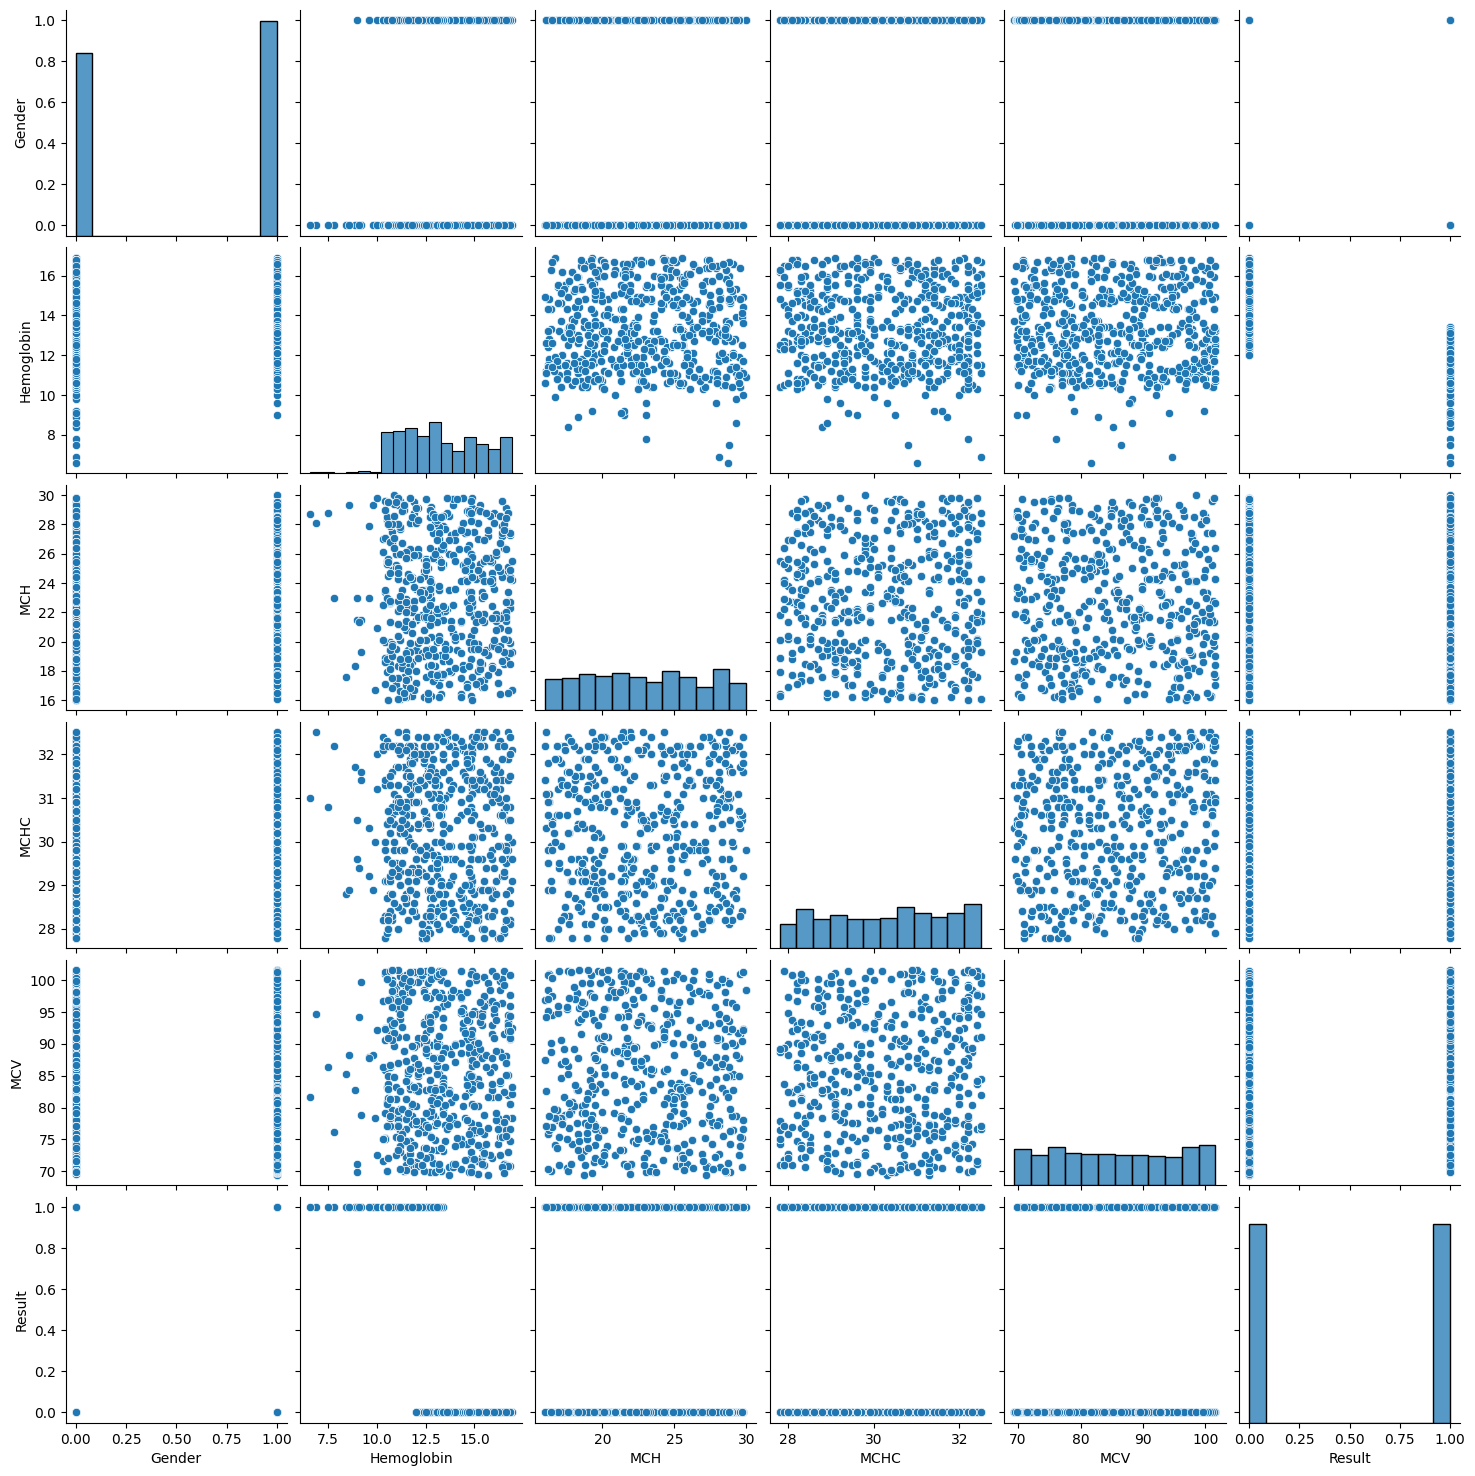

In [15]:
# Finding relation between multiple features
sns.pairplot(df)

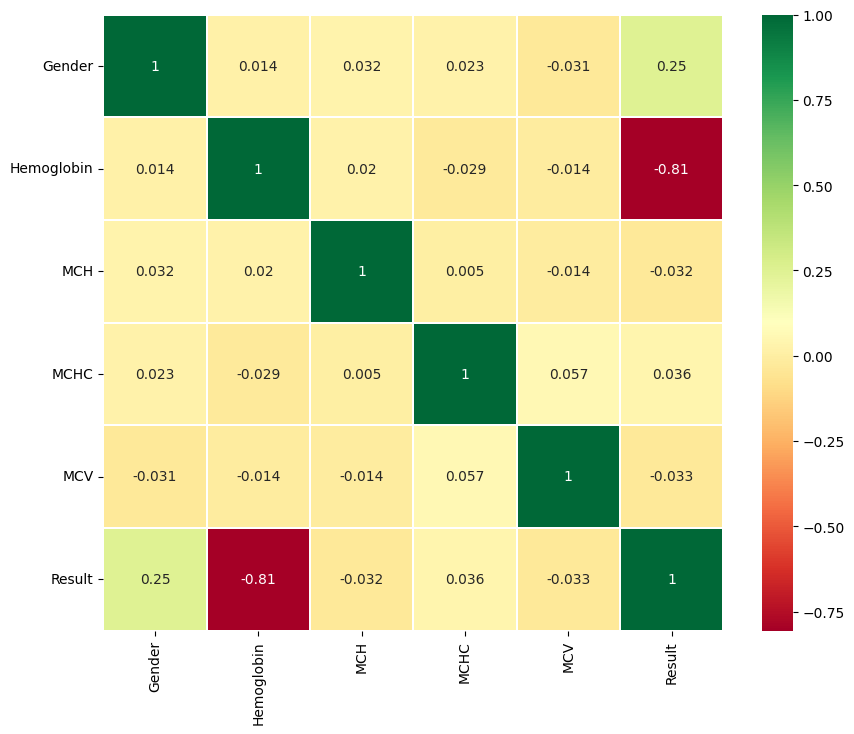

In [16]:
# Analyizing relations between features
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [17]:
# Splitting the label column from rest of the features
y = df['Result']
print(y)

1234    0
1188    0
106     0
954     0
112     0
       ..
1415    1
1416    1
1417    1
1418    1
1420    1
Name: Result, Length: 1240, dtype: int64


In [18]:
# All feature columns except label
x = df.drop(['Result'], axis = 1)
print(x)

      Gender  Hemoglobin   MCH  MCHC   MCV
1234       1        16.6  18.8  28.1  70.9
1188       0        15.3  18.3  30.4  93.4
106        0        14.8  20.4  28.5  91.1
954        0        14.6  16.9  31.9  78.1
112        0        15.9  28.7  31.0  81.6
...      ...         ...   ...   ...   ...
1415       1        13.2  20.1  28.8  91.2
1416       0        10.6  25.4  28.2  82.9
1417       1        12.1  28.3  30.4  86.9
1418       1        13.1  17.7  28.1  80.7
1420       0        11.8  21.2  28.4  98.1

[1240 rows x 5 columns]


In [19]:
# Splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [20]:
# Checking size of all the datasets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(992, 5)
(248, 5)
(992,)
(248,)


**Model Building**


In [21]:
# Importing required modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Making a decision tree model
model = DecisionTreeClassifier()

# Training the model on the data
model.fit(x_train, y_train)

# Using model to predict the label in the test dataset
y_pred = model.predict(x_test)

In [22]:
# Checking Accuracy of the model
acc_dt = accuracy_score(y_test,y_pred)
print("Accuracy Score: ", acc_dt)

Accuracy Score:  1.0


In [23]:
# Testing model by inputting data
prediction = model.predict([[0,13.8,30,35,85]])

if prediction[0] == 0:
  print("You don't have any Anemic Disease")

elif prediction[0] == 1:
  print("You have Anemic Disease")

You don't have any Anemic Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


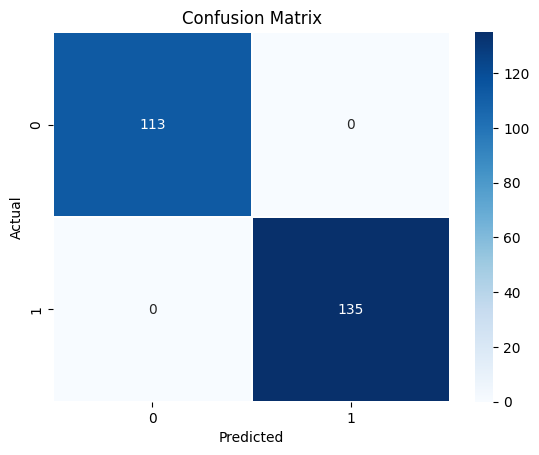

In [24]:
# Evaluating model performance with confusion matrix
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues', linewidths = 0.2, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Classification report
report = classification_report(y_test, y_pred,output_dict=True)
report_display = pd.DataFrame(report)
print(report_display)

               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    113.0  135.0       1.0      248.0         248.0


In [ ]:
# Making pickle file
import joblib

# Saving Model
joblib.dump(model, 'model.joblib')

# Loading the model
from google.colab import files

files.download('model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>